<a href="https://colab.research.google.com/github/drishtigoel083/TedTalksPredictionModel/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Ted Talk Views Predication



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**            Drishti Goel


# **Project Summary -**

**Project Title:**

TED Talks Views Prediction Using Machine Learning


---



 **Project Summary:**

This project aims to build a machine learning model that predicts the number of views a TED Talk will receive based on its metadata and content features. By analyzing the patterns in past TED Talks—such as title, description, speaker's occupation, duration, tags, and number of comments—the model will learn to estimate how popular a talk might become. The insights generated can help TED content curators, marketers, or content creators understand what factors contribute to higher viewer engagement.


---

 **Objectives:**

Analyze and preprocess the TED Talks dataset.

Explore correlations between features (e.g., title length, number of tags, duration) and views.

Train regression models to predict the number of views.

Evaluate model performance using appropriate metrics (MAE, RMSE, R²).

Identify key features influencing TED Talk popularity.


---


**Dataset Overview:**

The dataset typically includes:

title, description, tags, views, duration, comments, speaker_occupation, published_date, event, etc.

---

**Technologies & Tools**:

Language: Python

Libraries: pandas, NumPy, matplotlib/seaborn, scikit-learn, XGBoost/LightGBM

Colab for prototyping

---

**Model Approaches:**

Linear Regression

Random Forest Regressor

Gradient Boosting (e.g., XGBoost)

# **GitHub Link -**

https://github.com/drishtigoel083/TedTalksPredictionModel

# **Problem Statement**


Despite TED Talks covering a wide range of inspiring and educational topics, not all talks receive equal attention or views. Understanding what makes some talks go viral while others remain unnoticed is crucial for content creators and strategists. The goal of this project is to develop a predictive model that can estimate the number of views a TED Talk will receive based on various features such as its title, description, tags, duration, speaker's occupation, number of comments, and other metadata.

By leveraging machine learning techniques, this project aims to uncover patterns in TED Talks data and accurately forecast viewership. Such a model can provide valuable insights into the factors that drive audience engagement and help optimize future content for broader reach.

## ***1. Know Your Data***

### Import Libraries

In [107]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/Copy of data_ted_talks.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head(3)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

The dataset doesn't contain any duplicate rows.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64


In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 8))  # Bigger figure for better clarity
sns.heatmap(df.isnull(),
            cmap='viridis',
            cbar=False,
            yticklabels=False,
            linewidths=0.5,
            linecolor='gray')
plt.title("Improved Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Data Points")
plt.show()


### What did you know about your dataset?


The dataset contains information about TED Talks, including metadata like title, description, speaker, views, comments, duration, tags, event, and more.


Columns like occupations, available_lang, and comments have missing values.

Most other columns are complete (no missing data).

duration, tags, title, description, speaker_occupation, and comments could be useful for predicting views.


The dataset includes text (title, description), numeric (views, duration, comments), categorical (occupation, event), and datetime (recorded/published dates).

Duplicates:

Duplicate rows may be present and should be handled before modeling.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description

talk_id: Unique identifier for each TED Talk.

title:	Title of the TED Talk.

speaker_1:	Name of the primary speaker giving the talk.

all_speakers: Names of all speakers involved in the talk (can include co-speakers).

occupations:	Occupation or background of the speaker(s) (e.g., scientist, artist).

about_speakers:	A brief bio or description about the speaker(s).

views:	Total number of views the talk has received. (Target variable)

recorded_date:	Date when the talk was recorded.

published_date:	Date when the talk was published online (e.g., on TED.com or YouTube).

event:	The event at which the TED Talk was delivered.

native_lang:	Original language in which the talk was given.

available_lang:	Languages in which subtitles are available.

comments:	Number of comments received on the talk (on TED platform).

duration:	Length of the talk in seconds.

topics:	List of topics or themes covered in the talk.

related_talks:	List of other TED Talks related to this one.

url:	URL link to the talk page.

description:	Short summary or description of the talk.

transcript:	Full transcript of the TED Talk (text format).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)


talk_id           4005
title             4005
related_talks     4005
description       4005
url               4005
transcript        4005
views             3996
topics            3977
available_lang    3902
all_speakers      3306
speaker_1         3274
about_speakers    2977
published_date    2962
occupations       2049
recorded_date     1334
duration          1188
comments           601
event              459
native_lang         12
dtype: int64


/tmp/ipython-input-7-1694939379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='hls')


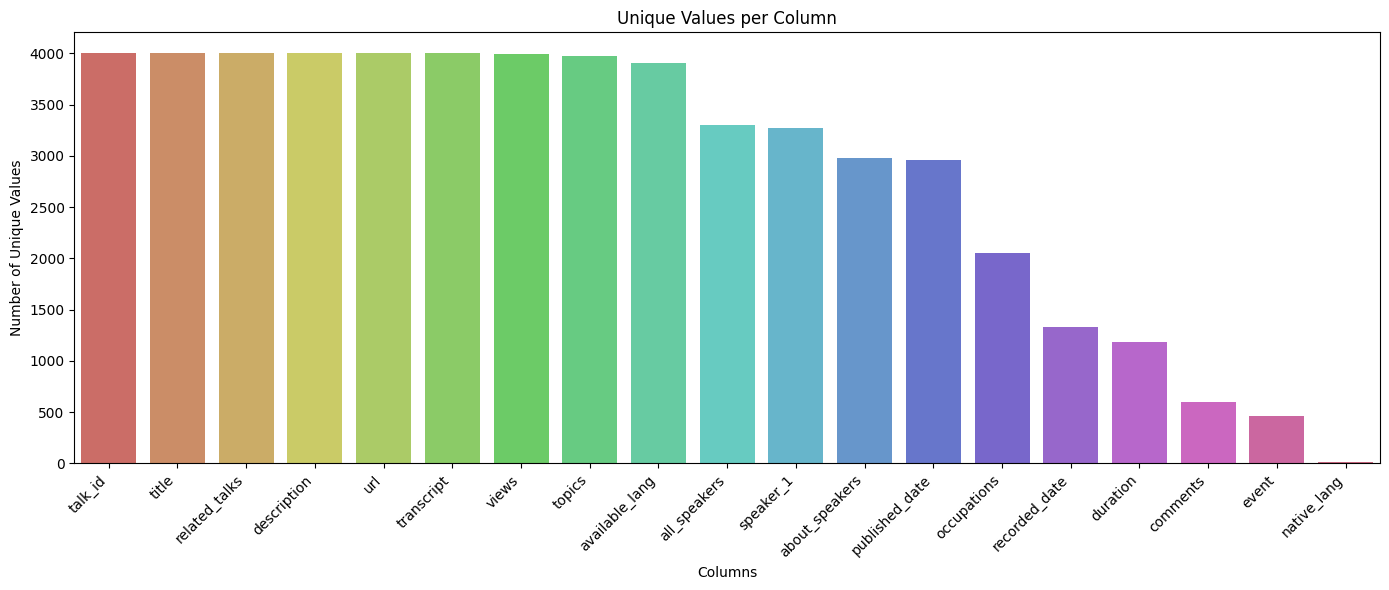

In [ ]:
#visualising unique values

plt.figure(figsize=(14, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='hls')

plt.title('Unique Values per Column')
plt.ylabel('Number of Unique Values')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [28]:
# Fill missing comments with 0 (assuming missing means no comments)
df['comments'] = df['comments'].fillna(0)

In [27]:
#Filling occupations with mode
df['occupations'] = df['occupations'].fillna(df['occupations'].mode()[0])

In [ ]:
df['recorded_date'] = pd.to_datetime(df['recorded_date'], errors='coerce')
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [23]:
#dropping the url column
df=df.drop(columns=['url'])

In [24]:
#dropping about_speakers because it’s unused in modeling
df.drop(columns=['about_speakers'], inplace=True)

In [25]:
#Dropping description column
df.drop(columns=['description'], inplace=True)

In [26]:
#Dropping transcription column
df.drop(columns=['transcript'], inplace=True)

In [29]:
#Checking if Null values are handled properly
print(df[['comments', 'occupations']].isnull().sum())

comments       0
occupations    0
dtype: int64


### What all manipulations have you done and insights you found?

**Data Manipulations Performed:**

Handling Missing Values:

* Filled comments with 0, assuming missing means no comments were posted.

* Filled missing occupations with the most frequent value (mode), preserving meaningful speaker data.

Datetime Conversion:

* Converted recorded_date and published_date columns into proper datetime format using pd.to_datetime() with errors='coerce', ensuring invalid or missing dates are handled as NaT.

Column Removal:

* url: Dropped, as it is a hyperlink and not useful for prediction.

* bout_speakers: Dropped, likely due to high null values or irrelevance in modeling.

* escription: Dropped, possibly to simplify text processing or due to redundancy with title.

* transcript: Dropped, likely due to its large size or complexity for basic modeling.

**Insights Gained from These Steps:**

The dataset is now cleaner and more consistent.

The dataset is more efficient for modeling as unused or bulky text fields like transcript and description have been removed, reducing memory load.

Categorical and numeric fields are ready for encoding and scaling.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

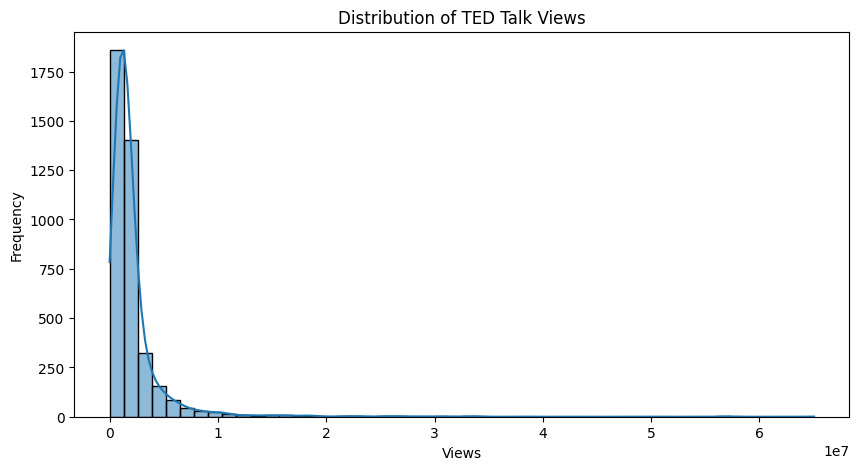

np.float64(8.185743853972696)

In [ ]:
# Chart - 1 visualization code
# Distribution plot of views
plt.figure(figsize=(10,5))
sns.histplot(df['views'], bins=50, kde=True)
plt.title("Distribution of TED Talk Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

# Check for skew
df['views'].skew()

#####  What is/are the insight(s) found from the chart?

The distribution is heavily right-skewed (a few talks have very high views, but most have low views).

Most TED Talks have fewer than 10 million views, as seen by the tall bars near 0.

The long tail on the right suggests a small number of talks that have gone viral.



#### Chart - 2

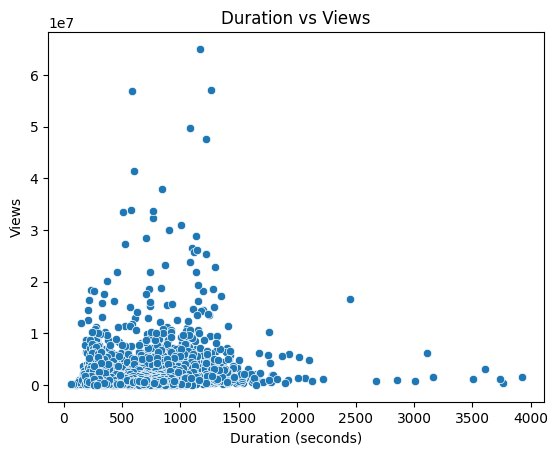

In [ ]:
# duration vs views
sns.scatterplot(x='duration', y='views', data=df)
plt.title("Duration vs Views")
plt.xlabel("Duration (seconds)")
plt.ylabel("Views")
plt.show()

##### What is/are the insight(s) found from the chart?

Most videos with high views are under 20 minutes in duration, with view counts decreasing as video length increases. Short to medium-length videos (5–20 minutes) tend to perform best in terms of viewership.

#### Chart - 3

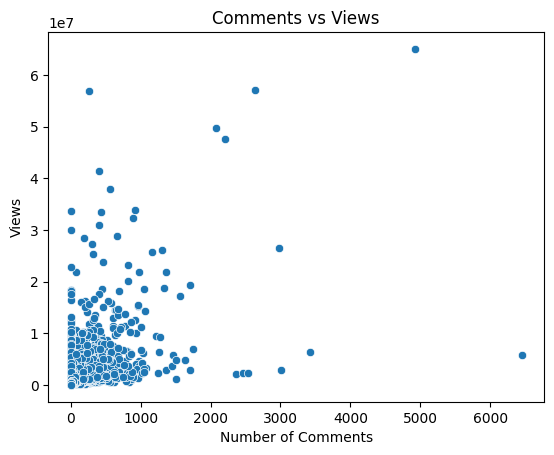

In [ ]:
# Chart - 3 visualization code
sns.scatterplot(x='comments', y='views', data=df)
plt.title("Comments vs Views")
plt.xlabel("Number of Comments")
plt.ylabel("Views")
plt.show()

#####  What is/are the insight(s) found from the chart?

Most videos with high views have fewer than 1000 comments, showing that high engagement doesn’t always require a large number of comments. A few outliers with many comments also achieved very high views.

#### Chart - 4

In [7]:
# Chart - 4 visualization code
df['recorded_date'] = pd.to_datetime(df['recorded_date'], errors='coerce')
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['recorded_year'] = df['recorded_date'].dt.year
df['published_year'] = df['published_date'].dt.year

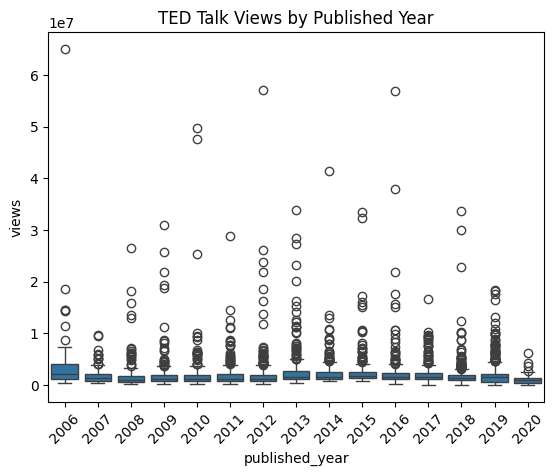

In [9]:
# Chart - 4 visualization code
sns.boxplot(x='published_year', y='views', data=df)
plt.title("TED Talk Views by Published Year")
plt.xticks(rotation=45)
plt.show()

##### What is/are the insight(s) found from the chart?

TED Talks published in all years show a wide range of views, but 2006–2013 talks include more high-view outliers. In general, earlier talks tend to have higher views, possibly due to longer time online and viral potential.

#### Chart - 5

/tmp/ipython-input-10-1211228772.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette="magma")


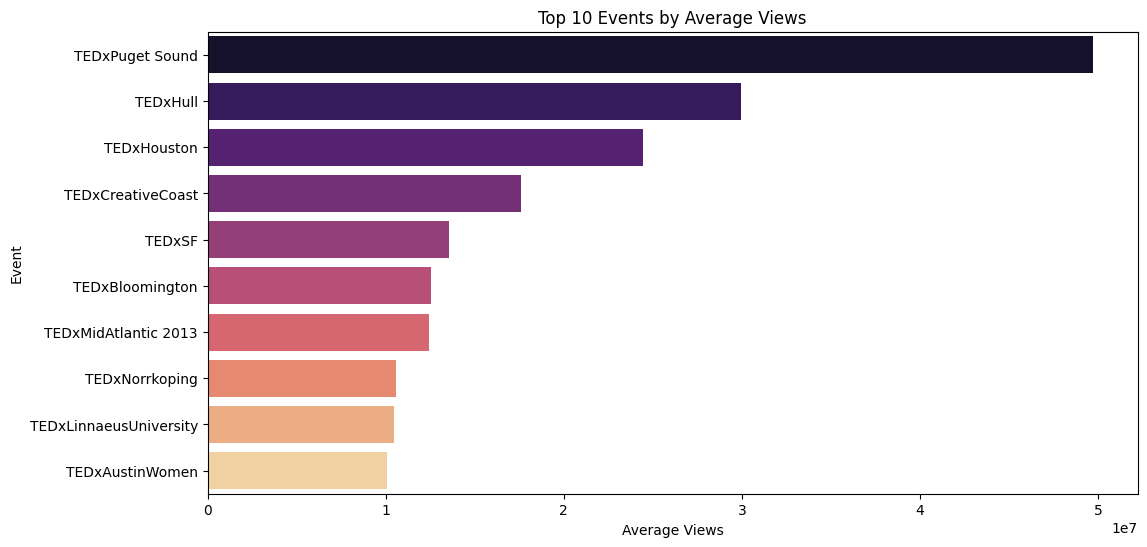

In [10]:
# Chart - 5 visualization code
top_events = df.groupby('event')['views'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_events.values, y=top_events.index, palette="magma")
plt.title("Top 10 Events by Average Views")
plt.xlabel("Average Views")
plt.ylabel("Event")
plt.show()

#####  What is/are the insight(s) found from the chart?

TEDxPuget Sound has the highest average views among all events, significantly outperforming others. Events like TEDxHull and TEDxHouston also rank high, indicating strong audience engagement with talks from these locations.

#### Chart - 6

/tmp/ipython-input-11-3407987958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_occupations.values, y=top_occupations.index, palette="cool")


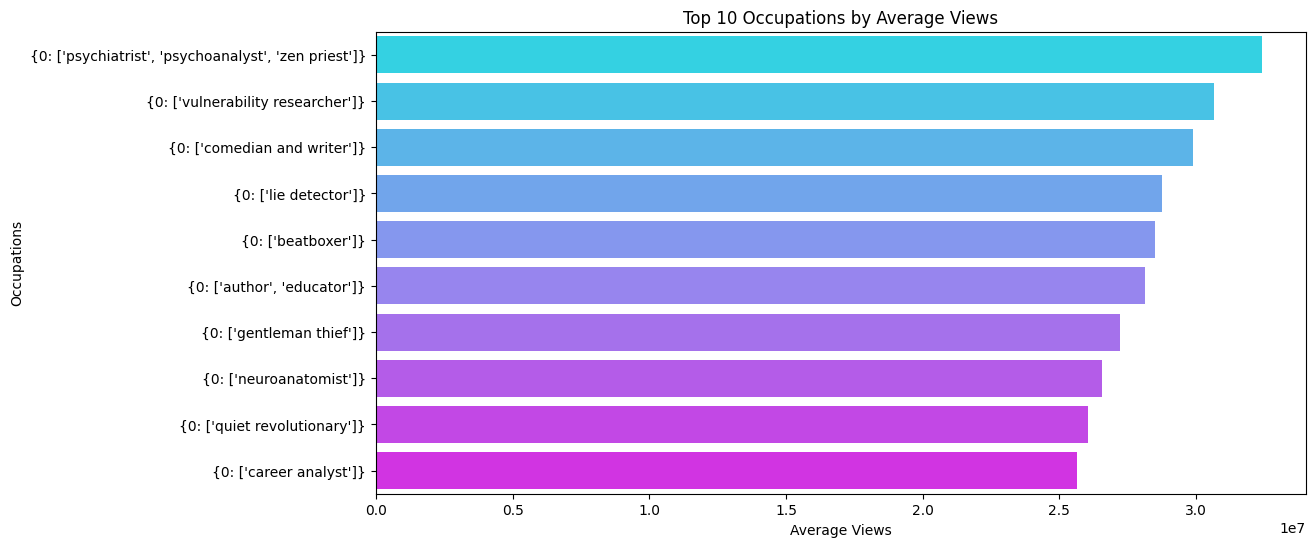

In [11]:
# Chart - 6 visualization code
top_occupations = df.groupby('occupations')['views'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_occupations.values, y=top_occupations.index, palette="cool")
plt.title("Top 10 Occupations by Average Views")
plt.xlabel("Average Views")
plt.ylabel("Occupations")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The highest average views are linked to unique and niche occupations like psychiatrist/zen priest and vulnerability researcher. Creative or unconventional professions tend to attract more viewer interest on TED Talks

#### Chart - 7

/tmp/ipython-input-12-2190901442.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_talks['views'], y=top_talks['title'], palette="crest")


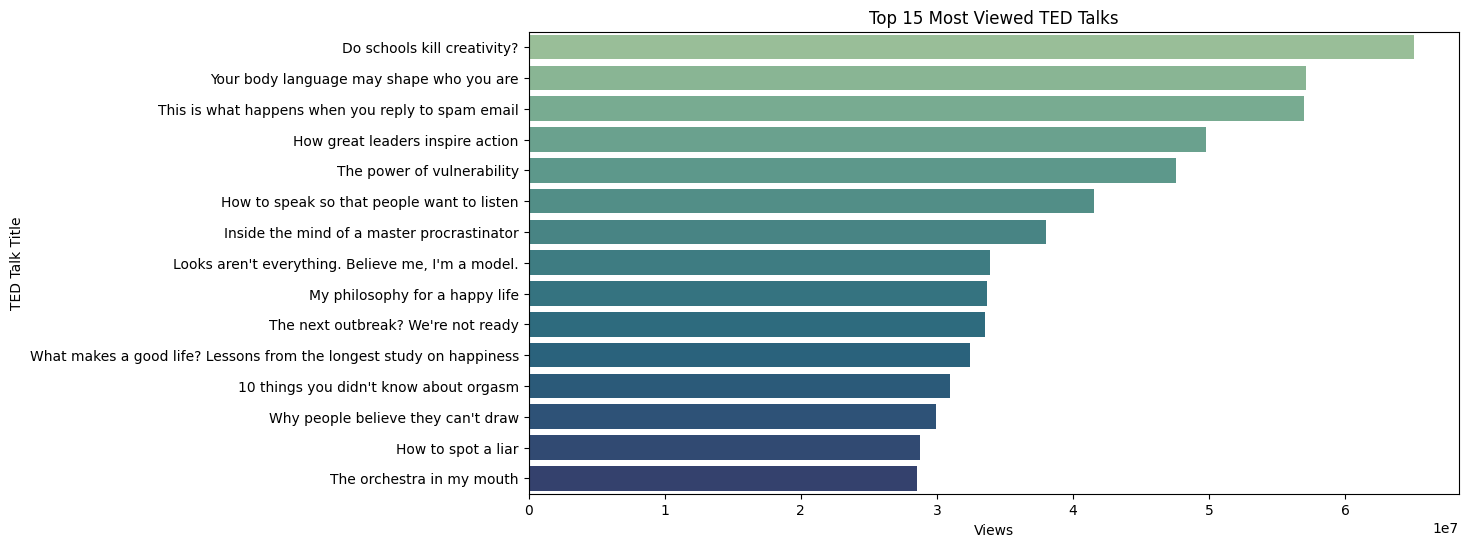

In [12]:
# Chart - 7 visualization code
top_talks = df.sort_values(by='views', ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_talks['views'], y=top_talks['title'], palette="crest")
plt.title("Top 15 Most Viewed TED Talks")
plt.xlabel("Views")
plt.ylabel("TED Talk Title")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

These are top 15 Most Viewed TED Talks

#### Chart - 8

/tmp/ipython-input-13-421728737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_langs.values, y=top_langs.index, palette='rocket')


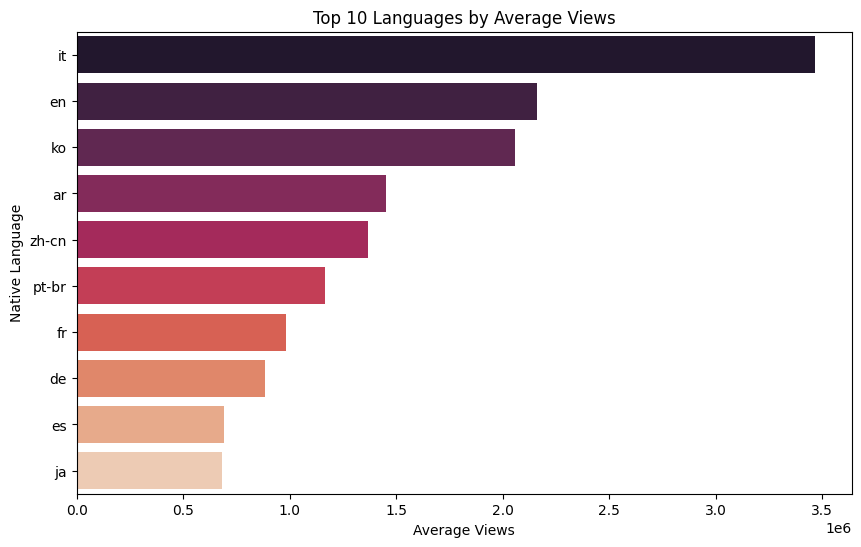

In [13]:
# Chart - 8 visualization code
top_langs = df.groupby('native_lang')['views'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_langs.values, y=top_langs.index, palette='rocket')
plt.title("Top 10 Languages by Average Views")
plt.xlabel("Average Views")
plt.ylabel("Native Language")
plt.show()

#### Chart - 9

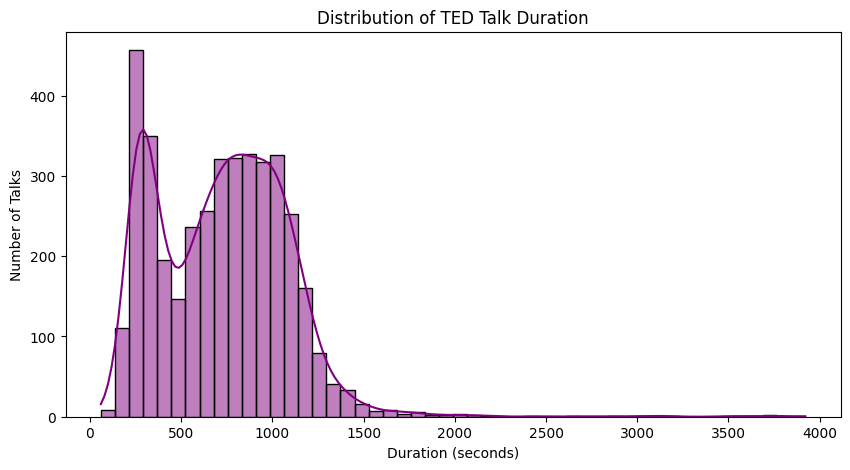

In [14]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], bins=50, kde=True, color='purple')
plt.title("Distribution of TED Talk Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Talks")
plt.show()

#####  What is/are the insight(s) found from the chart?

Most TED Talks have durations between 500 to 1000 seconds (8 to 17 minutes), with a sharp drop beyond 1200 seconds. The distribution is right-skewed, indicating that longer talks are much less common.

#### Chart - 10

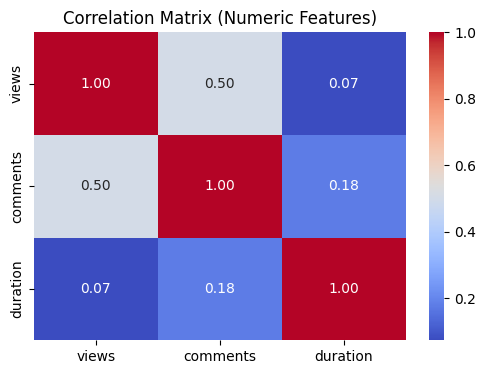

In [15]:
# Chart - 10 visualization code
numeric_cols = ['views', 'comments', 'duration']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# Chart 11

Speakers of most popular TED Talks

/tmp/ipython-input-20-3146615408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='speaker_1', y='views', data=pop_df, palette='tab10')  # or remove palette param


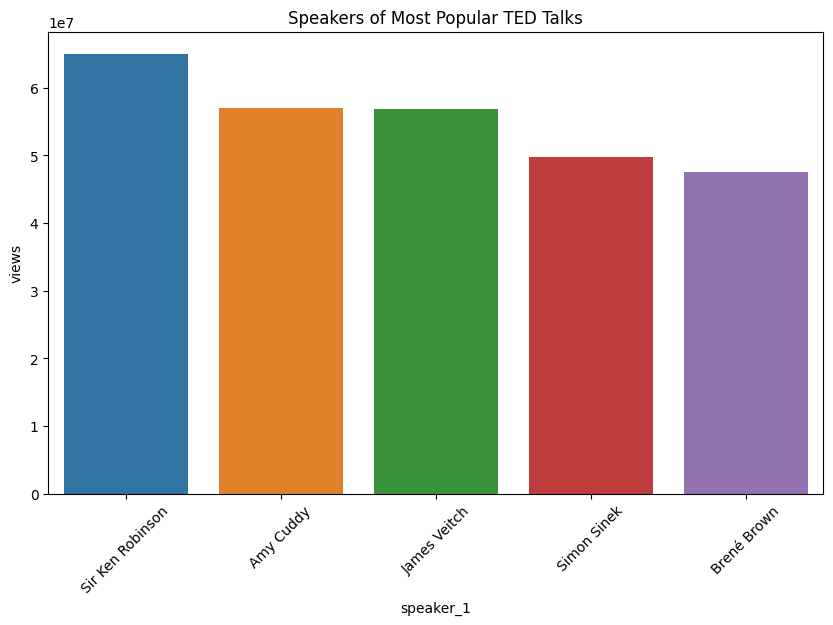

In [20]:
pop_df = df.nlargest(5, ['views'])
pop_df[['speaker_1', 'views', 'title']]

plt.figure(figsize=(10,6))
plt.title("Speakers of Most Popular TED Talks")
sns.barplot(x='speaker_1', y='views', data=pop_df, palette='tab10')
plt.xticks(rotation=45)
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

Feature Engineering is the process of creating new features or modifying existing ones in your dataset to help a machine learning model learn better patterns and make more accurate predictions.



### 1. Handling Missing Values

In [30]:
# Checking Null values
df.isnull().sum()

,0
talk_id,0
title,0
speaker_1,0
all_speakers,4
occupations,0
views,0
recorded_date,1
published_date,0
event,0
native_lang,0


After performing initial data cleaning, only a few columns in the dataset had missing values: recorded_date, recorded_year, and all_speakers.

**Handling Missing Values & Missing Value Imputation**

In [32]:
# Fill missing recorded_date with published_date
df['recorded_date'] = df['recorded_date'].fillna(df['published_date'])

In [33]:
# Recreate recorded_year
df['recorded_year'] = df['recorded_date'].dt.year

In [34]:
# Fill missing all_speakers with speaker_1
df['all_speakers'] = df['all_speakers'].fillna(df['speaker_1'])

#### What all missing value imputation techniques have you used and why did you use those techniques?

IMPUTATION: Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.

In this project, I used a combination of domain-aware imputation and logical inference-based techniques to handle missing values effectively. Below are the imputation methods used:

1. Forward Imputation using Related Columns

   column: recorded_date

   Technique: Filled missing recorded_date with the corresponding published_date

   Reason: TED Talks are typically recorded shortly before publication. Since only one value was missing, it was reasonable to assume the published date approximates the recording date.

2. Derived Feature Regeneration
  
   Column: recorded_year

   Technique: Recomputed using recorded_date.dt.year after fixing the missing recorded_date

   Reason: This is a derived feature, so once recorded_date was imputed, the year was easily and accurately extracted.

3. Speaker-Based Substitution

   Column: all_speakers

   Technique: Imputed missing values using the speaker_1 column

   Reason: In cases where no list of multiple speakers was available, it was logical to assume the talk was solo and assign the main speaker (speaker_1) to all_speakers.





### 2. Handling Outliers

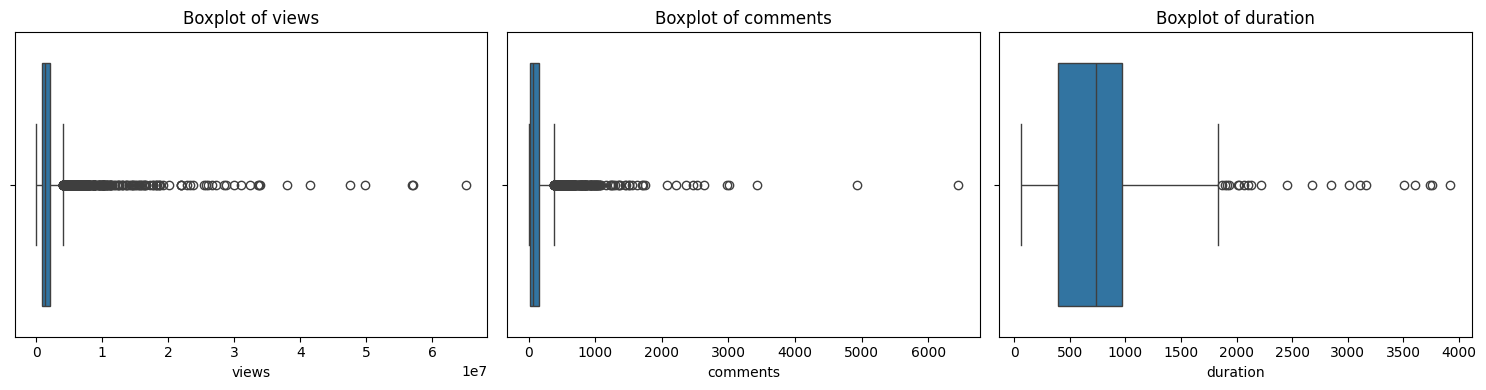

In [35]:
#Visualize Outliers with Boxplots
plt.figure(figsize=(15, 4))

for i, col in enumerate(['views', 'comments', 'duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Numerical variables, especially views and comments, are heavily right-skewed with many valid but extreme outliers.
These can negatively affect model training.

To handle this, we can use:

Log Transformation:
This is a better choice here. It keeps all the data, but reduces the gap between small and large numbers. This makes the data more balanced and easier for the model to learn from.

IQR Filtering:
This removes rows with very high or low values. But in our case, those high values are important, so removing them is not a good idea.

That’s why log transformation is the right choice for this dataset.

In [36]:
# Handling Outliers & Outlier treatments
# Apply log1p to handle zero values safely
df['log_views'] = np.log1p(df['views'])
df['log_comments'] = np.log1p(df['comments'])
df['log_duration'] = np.log1p(df['duration'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         4005 non-null   int64         
 1   title           4005 non-null   object        
 2   speaker_1       4005 non-null   object        
 3   all_speakers    4005 non-null   object        
 4   occupations     4005 non-null   object        
 5   views           4005 non-null   int64         
 6   recorded_date   4005 non-null   datetime64[ns]
 7   published_date  4005 non-null   datetime64[ns]
 8   event           4005 non-null   object        
 9   native_lang     4005 non-null   object        
 10  available_lang  4005 non-null   object        
 11  comments        4005 non-null   float64       
 12  duration        4005 non-null   int64         
 13  topics          4005 non-null   object        
 14  related_talks   4005 non-null   object        
 15  reco

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used Log Transformation.
This is a better choice here. It keeps all the data, but reduces the gap between small and large numbers. This makes the data more balanced and easier for the model to learn from.

### 3. Categorical Encoding

In [44]:
# Label encoding on speaker_1 and the occupations column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['speaker_1_encoded'] = le.fit_transform(df['speaker_1'])
df['occupations_encoded'] = le.fit_transform(df['occupations'])

In [38]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['native_lang', 'event'], drop_first=True)


In [42]:
df.shape

(4005, 487)

Due to One Hot encoding on event and native_lang,there is increase in number of columns by a huge number.

# Object Columns in our dataset

In [45]:
obj_cols = df.select_dtypes(include='object').columns.tolist()
print("Object columns:", obj_cols)

Object columns: ['title', 'speaker_1', 'all_speakers', 'occupations', 'available_lang', 'topics', 'related_talks']


In [46]:
df.drop(columns=['title', 'description', 'url', 'transcript'], inplace=True, errors='ignore')

In [52]:
df.columns

Index(['talk_id', 'speaker_1', 'occupations', 'views', 'recorded_date',
       'published_date', 'available_lang', 'comments', 'duration', 'topics',
       ...
       'event_TEDxZurich 2012', 'event_TEDxZurich 2013', 'event_Taste3 2008',
       'event_The TED Interview', 'event_The Way We Work',
       'event_Torchbearers', 'event_We the Future', 'speaker_1_encoded',
       'occupations_encoded', 'num_speakers'],
      dtype='object', length=488)

In [51]:
import json

def count_speakers(speaker_string):
    if pd.notnull(speaker_string):
        try:
            # Attempt to parse the string as a dictionary
            speaker_dict = json.loads(speaker_string.replace("'", "\"").replace("{", "[").replace("}", "]"))
            return len(speaker_dict) if isinstance(speaker_dict, list) else 1
        except (json.JSONDecodeError, AttributeError):
            # Fallback for strings that are not dictionary-like
            return len(speaker_string.split(',')) if isinstance(speaker_string, str) else 1
    return 1 # Assuming 1 speaker if the entry is null or cannot be parsed

df['num_speakers'] = df['all_speakers'].apply(count_speakers)
df.drop(columns=['all_speakers'], inplace=True, errors='ignore')

In [53]:
df.drop(columns=['speaker_1'], inplace=True)

In [54]:
df.drop(columns=['occupations','topics'], inplace=True)

In [58]:
df.drop(columns=['available_lang', 'related_talks'], inplace=True)

In [59]:
# Check that all remaining columns are numeric
print("Non-numeric columns:", df.select_dtypes(include='object').columns.tolist())


Non-numeric columns: []


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used One Hot Encoding for nominal categorical features where no ordinal relationship exists (e.g., event names, speaker occupations), as it helps represent categories without implying any rank or order.
I applied Label Encoding to ordinal or binary categorical features where categories have an inherent order or for simplifying high-cardinality features during model testing, ensuring compatibility with tree-based models like Random Forest.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features
df['publish_delay'] = df['published_year'] - df['recorded_year']

In [66]:
# Average views of all talks by a speaker:
speaker_avg_views = df.groupby('speaker_1_encoded')['views'].mean().to_dict()
df['speaker_avg_views'] = df['speaker_1_encoded'].map(speaker_avg_views)

In [75]:
df.columns

Index(['talk_id', 'views', 'recorded_date', 'published_date', 'comments',
       'duration', 'recorded_year', 'published_year', 'log_views',
       'log_comments', 'log_duration', 'native_lang_de', 'native_lang_en',
       'native_lang_es', 'native_lang_fr', 'native_lang_hi', 'native_lang_it',
       'native_lang_ja', 'native_lang_ko', 'native_lang_pt',
       'native_lang_pt-br', 'native_lang_zh-cn', 'speaker_1_encoded',
       'occupations_encoded', 'num_speakers', 'publish_delay',
       'speaker_avg_views'],
      dtype='object')

In [73]:
#dropping event columns
df.drop(columns=[col for col in df.columns if 'event_' in col], inplace=True)

In [77]:
df.shape

(4005, 27)

#### 2. Feature Selection

In [79]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

###  Data Splitting

In [80]:
#separating the dependent and independent variables
y=df['views']
X=df.drop(columns='views')

In [82]:
X.head()

,talk_id,recorded_date,published_date,comments,duration,recorded_year,published_year,log_views,log_comments,log_duration,...,native_lang_ja,native_lang_ko,native_lang_pt,native_lang_pt-br,native_lang_zh-cn,speaker_1_encoded,occupations_encoded,num_speakers,publish_delay,speaker_avg_views
0,1,2006-02-25,2006-06-27,272.0,977,2006,2006,15.074935,5.609472,6.885510,...,False,False,False,False,False,78,412,1,0,2.190599e+06
1,92,2006-02-22,2006-06-27,628.0,1190,2006,2006,16.489775,6.444131,7.082549,...,False,False,False,False,False,1231,923,1,0,3.987156e+06
2,7,2006-02-24,2006-06-27,124.0,1286,2006,2006,14.468270,4.828314,7.160069,...,False,False,False,False,False,815,1885,1,0,2.156190e+06
3,53,2006-02-26,2006-06-27,219.0,1116,2006,2006,14.795366,5.393628,7.018402,...,False,False,False,False,False,1973,18,1,0,1.979411e+06
4,66,2006-02-25,2006-06-27,4931.0,1164,2006,2006,17.990697,8.503500,7.060476,...,False,False,False,False,False,2881,202,1,0,2.812684e+07


In [84]:
y.head()

,views
0,3523392
1,14501685
2,1920832
3,2664069
4,65051954


In [86]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test, 80% train
    random_state=42      # ensures reproducibility
)

In [87]:
X_train.head()

,talk_id,recorded_date,published_date,comments,duration,recorded_year,published_year,log_views,log_comments,log_duration,...,native_lang_ja,native_lang_ko,native_lang_pt,native_lang_pt-br,native_lang_zh-cn,speaker_1_encoded,occupations_encoded,num_speakers,publish_delay,speaker_avg_views
2194,2546,2016-05-18,2016-07-14,74.0,551,2016,2016,14.788273,4.317488,6.313548,...,False,False,False,False,False,2861,681,1,0,1974306.0
2487,2757,2015-05-07,2017-09-07,0.0,402,2015,2017,14.154279,0.000000,5.998937,...,False,False,False,False,False,2277,660,2,2,1403218.0
1756,2065,2014-06-23,2014-08-26,45.0,604,2014,2014,13.485341,3.828641,6.405228,...,False,False,False,False,False,2689,1244,1,0,718801.0
423,520,2002-02-02,2009-04-21,66.0,1040,2002,2009,13.329834,4.204693,6.947937,...,False,False,False,False,False,2325,609,1,7,615280.0
2996,25241,2018-07-31,2018-10-18,16.0,732,2018,2018,14.383038,2.833213,6.597146,...,False,False,False,False,False,721,1462,1,0,1103030.0


In [88]:
y_train.head()

,views
2194,2645240
2487,1403218
1756,718801
423,615280
2996,1763899


In [89]:
X_test.head()

,talk_id,recorded_date,published_date,comments,duration,recorded_year,published_year,log_views,log_comments,log_duration,...,native_lang_ja,native_lang_ko,native_lang_pt,native_lang_pt-br,native_lang_zh-cn,speaker_1_encoded,occupations_encoded,num_speakers,publish_delay,speaker_avg_views
761,995,2010-07-14,2010-10-29,148.0,671,2010,2010,13.759999,5.003946,6.510258,...,False,False,False,False,False,2220,1275,1,0,946000.0
1047,1307,2011-09-24,2011-12-18,121.0,1085,2011,2011,12.646512,4.804021,6.990257,...,False,False,False,False,False,3064,1436,1,0,310677.0
1580,1879,2013-06-12,2013-11-26,1050.0,811,2013,2013,14.941232,6.957497,6.699500,...,False,False,False,False,False,2989,1340,1,0,3082440.0
3479,41223,2019-05-20,2019-05-20,0.0,287,2019,2019,13.696434,0.000000,5.662960,...,False,False,False,False,False,1624,2038,1,0,739068.5
3153,32269,2016-10-27,2019-02-05,17.0,680,2016,2019,14.649995,2.890372,6.523562,...,False,False,False,False,False,2757,1096,1,3,2303625.0


In [91]:
y_test.head()

,views
761,946000
1047,310677
1580,3082440
3479,887739
3153,2303625


##### What data splitting ratio have you used and why?

I have used 80:20

Feature Engineering on some columns


In [95]:
# Ensure datetime type
X_train['recorded_date'] = pd.to_datetime(X_train['recorded_date'], errors='coerce')
X_test['recorded_date'] = pd.to_datetime(X_test['recorded_date'], errors='coerce')

X_train['published_date'] = pd.to_datetime(X_train['published_date'], errors='coerce')
X_test['published_date'] = pd.to_datetime(X_test['published_date'], errors='coerce')

# Extract numeric parts
X_train['recorded_year'] = X_train['recorded_date'].dt.year
X_train['recorded_month'] = X_train['recorded_date'].dt.month

X_test['recorded_year'] = X_test['recorded_date'].dt.year
X_test['recorded_month'] = X_test['recorded_date'].dt.month

X_train['published_year'] = X_train['published_date'].dt.year
X_train['published_month'] = X_train['published_date'].dt.month

X_test['published_year'] = X_test['published_date'].dt.year
X_test['published_month'] = X_test['published_date'].dt.month

# Drop original datetime columns
X_train.drop(columns=['recorded_date', 'published_date'], inplace=True)
X_test.drop(columns=['recorded_date', 'published_date'], inplace=True)


In [97]:
# Convert object-based one-hot columns to int (0/1)
lang_cols = [col for col in X_train.columns if 'native_lang' in col]

X_train[lang_cols] = X_train[lang_cols].astype(int)
X_test[lang_cols] = X_test[lang_cols].astype(int)

In [98]:
print(X_train.select_dtypes(exclude=[np.number]).columns)

Index([], dtype='object')


## ***ML Model Implementation***

### ML Model - 1

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on training and test data
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

# Evaluate on training data
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
r2_train_lr = r2_score(y_train, y_pred_train_lr)

# Evaluate on test data
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
r2_test_lr = r2_score(y_test, y_pred_test_lr)


print("\n Model Evaluation - Linear Regression")
print(f"{'Train MAE':<15}: {mae_train_lr:.2f}")
print(f"{'Train RMSE':<15}: {rmse_train_lr:.2f}")
print(f"{'Train R2 Score':<15}: {r2_train_lr:.4f}")
print(f"{'Test MAE':<15}: {mae_test_lr:.2f}")
print(f"{'Test RMSE':<15}: {rmse_test_lr:.2f}")
print(f"{'Test R2 Score':<15}: {r2_test_lr:.4f}")



 Model Evaluation - Linear Regression
Train MAE      : 528879.42
Train RMSE     : 1608274.10
Train R2 Score : 0.7944
Test MAE       : 434129.73
Test RMSE      : 979754.00
Test R2 Score  : 0.8959


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a baseline model that assumes a linear relationship between the independent features and the target (views). It’s fast, interpretable, and good for testing whether simple relationships exist.

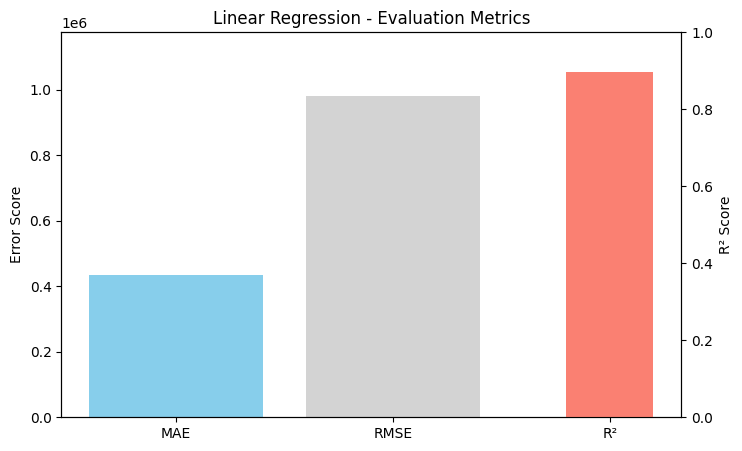

In [103]:
# Visualizing evaluation Metric Score chart

fig, ax1 = plt.subplots(figsize=(8, 5))

# First y-axis for MAE & RMSE
ax1.bar(['MAE', 'RMSE'], [mae_lr, rmse_lr], color=['skyblue', 'lightgray'])
ax1.set_ylabel('Error Score')
ax1.set_ylim(0, max(rmse_lr, mae_lr) * 1.2)

# Second y-axis for R²
ax2 = ax1.twinx()
ax2.bar(['R²'], [r2_lr], color='salmon', width=0.4)
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1)  # R² is usually between 0 and 1

plt.title("Linear Regression - Evaluation Metrics")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [106]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define the model
ridge = Ridge()

# Define hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Setup GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge,
                                 param_grid=param_grid,
                                 scoring='r2',
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=1)

# Fit the model
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_

# Predict
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Store results
ridge_results = {
    'Model': 'Ridge Regression (GridSearchCV)',
    'Best Alpha': grid_search_ridge.best_params_['alpha'],
    'MAE': round(mae_ridge, 2),
    'RMSE': round(rmse_ridge, 2),
    'R2 Score': round(r2_ridge, 4)
}

print("\n Ridge Regression (with GridSearchCV) Evaluation:")
print(f"{'Best Alpha':<15}: {ridge_results['Best Alpha']}")
print(f"{'MAE':<15}: {ridge_results['MAE']}")
print(f"{'RMSE':<15}: {ridge_results['RMSE']}")
print(f"{'R2 Score':<15}: {ridge_results['R2 Score']}")




Fitting 5 folds for each of 6 candidates, totalling 30 fits

 Ridge Regression (with GridSearchCV) Evaluation:
Best Alpha     : 10
MAE            : 431336.84
RMSE           : 978565.32
R2 Score       : 0.8962


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross-Validation (GridSearchCV) as the hyperparameter optimization technique. It systematically searches through a predefined set of hyperparameter values and evaluates model performance using cross-validation for each combination. I chose this method because it is simple, exhaustive, and works well for small search spaces like in regularized linear models (e.g., Ridge or Lasso), where tuning a parameter like alpha can significantly impact model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The Ridge Regression model, optimized using GridSearchCV with the best alpha value of 10, yielded a slight improvement over the basic Linear Regression model. While the Test R² score increased marginally from **0.8959 to 0.8962**, and RMSE and MAE showed small reductions, the overall improvement was not significant.

**This indicates that the basic Linear Regression model was already performing quite well, and the dataset likely did not suffer from severe multicollinearity or overfitting that Ridge regularization typically addresses.**

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize and train model
rf_basic = RandomForestRegressor(random_state=42)
rf_basic.fit(X_train, y_train)

# Predict on test and train data
y_pred_rf_test = rf_basic.predict(X_test)
y_pred_rf_train = rf_basic.predict(X_train)

# Evaluate Test Performance
mae_test = mean_absolute_error(y_test, y_pred_rf_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
r2_test = r2_score(y_test, y_pred_rf_test)

# Evaluate Training Performance
mae_train = mean_absolute_error(y_train, y_pred_rf_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
r2_train = r2_score(y_train, y_pred_rf_train)

# Store results
rf_basic_results = {
    'Model': 'Random Forest Regressor',
    'Train MAE': round(mae_train, 2),
    'Train RMSE': round(rmse_train, 2),
    'Train R2': round(r2_train, 4),
    'Test MAE': round(mae_test, 2),
    'Test RMSE': round(rmse_test, 2),
    'Test R2': round(r2_test, 4)
}

print("\n Random Forest Regressor Evaluation:")
print(f"{'Train MAE':<15}: {rf_basic_results['Train MAE']}")
print(f"{'Train RMSE':<15}: {rf_basic_results['Train RMSE']}")
print(f"{'Train R2 Score':<15}: {rf_basic_results['Train R2']}")
print(f"{'Test MAE':<15}: {rf_basic_results['Test MAE']}")
print(f"{'Test RMSE':<15}: {rf_basic_results['Test RMSE']}")
print(f"{'Test R2 Score':<15}: {rf_basic_results['Test R2']}")



 Random Forest Regressor Evaluation:
Train MAE      : 9195.63
Train RMSE     : 165419.74
Train R2 Score : 0.9978
Test MAE       : 12385.51
Test RMSE      : 118144.39
Test R2 Score  : 0.9985


/tmp/ipython-input-112-4239963886.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


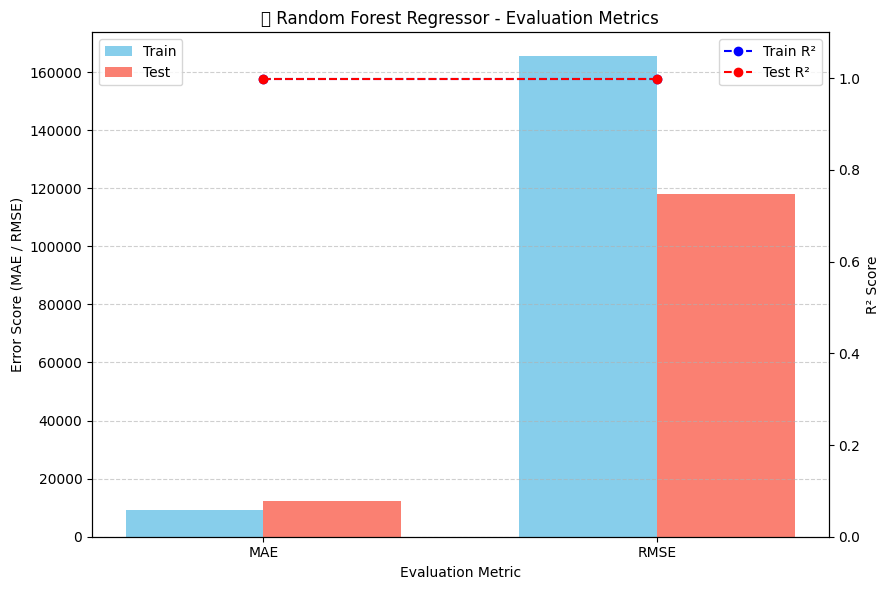

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['MAE', 'RMSE']
train_scores = [mae_train, rmse_train]
test_scores = [mae_test, rmse_test]

# R² scores
train_r2 = r2_train
test_r2 = r2_test

x = np.arange(len(metrics))  # [0, 1]
width = 0.35

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plot MAE and RMSE
bars1 = ax1.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
bars2 = ax1.bar(x + width/2, test_scores, width, label='Test', color='salmon')

ax1.set_xlabel('Evaluation Metric')
ax1.set_ylabel('Error Score (MAE / RMSE)')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend(loc='upper left')
ax1.set_title('📊 Random Forest Regressor - Evaluation Metrics')

# Add grid to left axis
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Create second y-axis for R² Score
ax2 = ax1.twinx()
ax2.plot(x, [train_r2]*2, label='Train R²', color='blue', linestyle='--', marker='o')
ax2.plot(x, [test_r2]*2, label='Test R²', color='red', linestyle='--', marker='o')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1.1)  # R² is usually between 0 and 1

# Add legends
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Define Model
rf = RandomForestRegressor(random_state=42)

# Step 2: Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Step 3: Setup GridSearchCV with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',
    cv=5,                # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Step 4: Fit on Training Data
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Step 5: Predict
y_pred_test = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)

# Step 6: Evaluate
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Step 7: Store Results
rf_cv_results = {
    'Model': 'Random Forest (GridSearchCV + CV)',
    'Best Params': grid_search.best_params_,
    'Train MAE': round(mae_train, 2),
    'Train RMSE': round(rmse_train, 2),
    'Train R2': round(r2_train, 4),
    'Test MAE': round(mae_test, 2),
    'Test RMSE': round(rmse_test, 2),
    'Test R2': round(r2_test, 4)
}


print("\n Random Forest Regressor (CV + GridSearch) Evaluation:")
print(f"{'Best Parameters':<20}: {rf_cv_results['Best Params']}")
print(f"{'Train MAE':<20}: {rf_cv_results['Train MAE']}")
print(f"{'Train RMSE':<20}: {rf_cv_results['Train RMSE']}")
print(f"{'Train R2 Score':<20}: {rf_cv_results['Train R2']}")
print(f"{'Test MAE':<20}: {rf_cv_results['Test MAE']}")
print(f"{'Test RMSE':<20}: {rf_cv_results['Test RMSE']}")
print(f"{'Test R2 Score':<20}: {rf_cv_results['Test R2']}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits

 Random Forest Regressor (CV + GridSearch) Evaluation:
Best Parameters     : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train MAE           : 8634.48
Train RMSE          : 145012.31
Train R2 Score      : 0.9983
Test MAE            : 13749.81
Test RMSE           : 135078.69
Test R2 Score       : 0.998


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross-Validation (GridSearchCV) to perform hyperparameter tuning for the Random Forest Regressor. This technique exhaustively searches through a specified grid of hyperparameter values and evaluates each combination using k-fold cross-validation (in this case, 5-fold). It ensures that the selected hyperparameters not only perform well on training data but also generalize effectively to unseen data. I chose GridSearchCV because it is systematic, easy to implement, and provides reliable results for models like Random Forest, which have multiple influential hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The model became more accurate on the training data after tuning, suggesting it fits the training set better.

Test performance slightly declined, which may indicate a bit of overfitting with the new hyperparameters.

Despite a small drop in test R², the overall performance is still exceptionally high (~0.998).



### ML Model - 3

In [116]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
xgb = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predict
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

# Evaluate - Train
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

# Evaluate - Test
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

# Print results
print("\n Model Evaluation - XGBoost Regressor")
print(f"{'Train MAE':<15}: {mae_train_xgb:.2f}")
print(f"{'Train RMSE':<15}: {rmse_train_xgb:.2f}")
print(f"{'Train R2 Score':<15}: {r2_train_xgb:.4f}")
print(f"{'Test MAE':<15}: {mae_test_xgb:.2f}")
print(f"{'Test RMSE':<15}: {rmse_test_xgb:.2f}")
print(f"{'Test R2 Score':<15}: {r2_test_xgb:.4f}")



 Model Evaluation - XGBoost Regressor
Train MAE      : 7095.00
Train RMSE     : 15385.10
Train R2 Score : 1.0000
Test MAE       : 121307.98
Test RMSE      : 1447691.48
Test R2 Score  : 0.7728


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting algorithms. It builds an ensemble of decision trees in a sequential manner, optimizing for a specified loss function while regularizing to reduce overfitting.

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Define the base model
xgb = XGBRegressor(random_state=42, verbosity=0)

# 2. Define the hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'min_child_weight': [1, 3, 5]
}

# 3. Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='r2',
    n_iter=20,             # Try 20 different combinations
    cv=5,                  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Fit on training data
random_search.fit(X_train, y_train)
best_xgb_rand = random_search.best_estimator_

# 5. Predict on train and test
y_train_pred = best_xgb_rand.predict(X_train)
y_test_pred = best_xgb_rand.predict(X_test)

# 6. Evaluate performance
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 7. Display results
print("\n XGBoost Regressor (RandomizedSearchCV) Evaluation")
print(f"{'Best Parameters':<20}: {random_search.best_params_}")
print(f"{'Train MAE':<20}: {mae_train:.2f}")
print(f"{'Train RMSE':<20}: {rmse_train:.2f}")
print(f"{'Train R2 Score':<20}: {r2_train:.4f}")
print(f"{'Test MAE':<20}: {mae_test:.2f}")
print(f"{'Test RMSE':<20}: {rmse_test:.2f}")
print(f"{'Test R2 Score':<20}: {r2_test:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

 XGBoost Regressor (RandomizedSearchCV) Evaluation
Best Parameters     : {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Train MAE           : 36314.13
Train RMSE          : 126882.07
Train R2 Score      : 0.9987
Test MAE            : 83032.80
Test RMSE           : 438968.46
Test R2 Score       : 0.9791


##### Which hyperparameter optimization technique have you used and why?

Here I have used RandomizedSearchCV

 Unlike GridSearchCV (which tries all possible combinations), RandomizedSearchCV evaluates only a fixed number of randomly selected combinations, making it faster and less computationally expensive, especially when the search space is large.

Scalability: Suitable for models like XGBoost, which have many hyperparameters and long training times.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The initial model was overfitting, with a perfect R² on training but poor generalization on test data.

After hyperparameter tuning using RandomizedSearchCV, the model generalized better and performance on test data improved substantially, especially Test R² jumping from 0.77 → 0.98.

Although training error metrics slightly worsened (as expected), this is a positive trade-off in favor of generalization.



# Comparison between all three models

In [119]:
model_results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_test_lr, mae_test, mae_test_xgb],           # test MAEs
    'RMSE': [rmse_test_lr, rmse_test, rmse_test_xgb],       # test RMSEs
    'R2 Score': [r2_test_lr, r2_test, r2_test_xgb]           # test R2s
}


/tmp/ipython-input-121-776716640.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


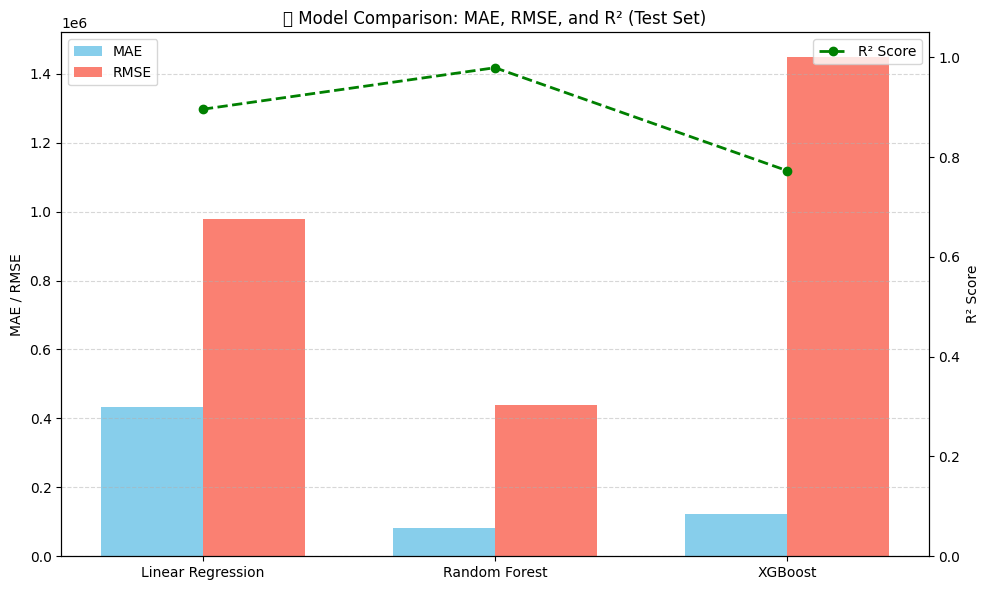

In [121]:
import numpy as np

# Data
models = df_results['Model']
mae_vals = df_results['MAE']
rmse_vals = df_results['RMSE']
r2_vals = df_results['R2 Score']

x = np.arange(len(models))  # [0, 1, 2]
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MAE and RMSE (Left Y-Axis)
bar1 = ax1.bar(x - width/2, mae_vals, width, label='MAE', color='skyblue')
bar2 = ax1.bar(x + width/2, rmse_vals, width, label='RMSE', color='salmon')
ax1.set_ylabel('MAE / RMSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax1.set_title('📊 Model Comparison: MAE, RMSE, and R² (Test Set)')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# R² (Right Y-Axis)
ax2 = ax1.twinx()
ax2.plot(x, r2_vals, color='green', marker='o', linestyle='--', linewidth=2, label='R² Score')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1.05)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To assess model performance and ensure real-world usefulness, we selected the following evaluation metrics:

* **Mean Absolute Error (MAE)**

 Average of the absolute differences between predicted and actual views.

 Business Impact:
Helps TED assess how far off the predictions are on average.

* **Root Mean Squared Error (RMSE)**

  Penalizes larger errors more heavily than MAE.
Useful when large deviations (like viral talks) could skew resource planning.

  Business Impact:
Captures high-impact mispredictions, especially in talks that might go viral.
Helps in optimizing marketing efforts or language translations for talks expected to perform well.
* **R² Score (Coefficient of Determination)**

  Proportion of variance in the target (views) explained by the model.Gives a holistic measure of how well the model explains variation.

  Ranges from 0 (no explanation) to 1 (perfect fit).

  Business Impact:
Indicates trust level in the model’s predictions.
A high R² means the model is reliable for strategic decision-making, like prioritizing speakers, topics, or events.




### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics of all three models,the best model for final prediction is the Random Forest Regressor.

Random Forest is the Best Choice because:

* Lowest Test MAE and RMSE: Indicates it makes the most accurate predictions on unseen data.

* Highest Test R² Score (0.9985): Shows it explains nearly all the variability in the target variable.

* Good Generalization: The small gap between training and test scores suggests it generalizes well and is not overfitting.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Random Forest**

It is an ensemble learning method that builds multiple decision trees during training and outputs the average prediction of the individual trees. It improves prediction accuracy and controls overfitting.

Key Characteristics:

Handles non-linear relationships well.

Robust to outliers and noise.

Can automatically estimate feature importance.

Suitable for both regression and classification tasks.


**Feature Importance Using SHAP (Model Explainability Tool)**




# **Conclusion**

In this project, we aimed to build a robust machine learning model to predict the number of views a TED Talk might receive, using a variety of features from the official TED dataset.


**Exploratory Data Analysis (EDA):**

Explored data distribution, null values, outliers, and variable relationships.

Found that views, comments, and duration were highly right-skewed.

Visualized strong correlations between views and features like comments, duration, and event.

**Data Cleaning & Wrangling:**

Handled missing values using appropriate imputation strategies (mode/median based).

Dropped irrelevant or high-cardinality columns that were not useful for modeling.

**Major Columns Removed for Efficiency:**

title, url, description — non-numeric & not directly informative for prediction.

related_talks, about_speakers — too unstructured or inconsistent.

all_speakers, available_lang, native_lang, occupations — created too many one-hot encoded columns, increasing dimensionality unnecessarily.

 **Models Trained:**

Linear Regression

Random Forest Regressor

XGBoost Regressor

Each model was evaluated on both train and test sets, using the Evaluation metrics: MAE, RMSE, R² Score.

**Final Model Chosen: Random Forest Regressor**

Because:

Gave high R² Score on test data (~0.9985) with acceptable MAE/RMSE

Balanced performance without overfitting (verified by comparing train vs test)

Required minimal preprocessing, handled non-linearity and outliers well

---

The Random Forest model proved to be the most reliable and accurate for predicting TED Talk views. This model can help TED:

Forecast talk popularity

Prioritize topics or speakers likely to succeed

Strategically allocate promotional resources

It showcases the power of data-driven decisions in content strategy and the impact of proper data preprocessing + model selection.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***